In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("/home/negi/M_L/Naiv-byes/creditcard.csv")
print(dataset)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
dataset['label'] = dataset.Class.map({0:'Geninue',1:'fraud'})

In [17]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Geninue
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Geninue
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Geninue
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Geninue
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Geninue


In [24]:
dataset.label.value_counts()

Geninue    284315
fraud         492
Name: label, dtype: int64

 Class as pie chart:


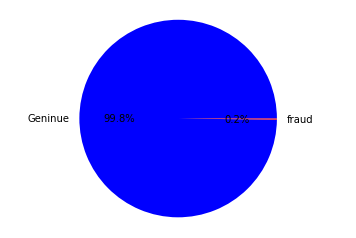

In [27]:
import matplotlib.pyplot as plt
print(" Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(dataset.Class.value_counts(),autopct='%1.1f%%', labels=['Geninue','fraud'], colors=['blue','red'])
plt.axis('equal')
plt.ylabel('')
plt.show()

In [32]:
dataset["Time"].tail()

284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [33]:
dataset["Time_Hr"] = dataset["Time"]/3600 # convert to hours
print(dataset["Time_Hr"].tail(5))

284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, 'transactions')

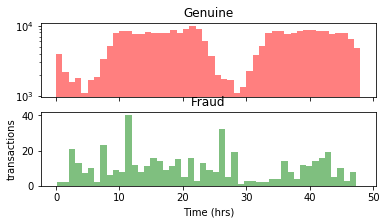

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(dataset.Time_Hr[dataset.Class==0],bins=48,color='r',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(dataset.Time_Hr[dataset.Class==1],bins=48,color='g',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('transactions')

Text(0, 0.5, 'transactions')

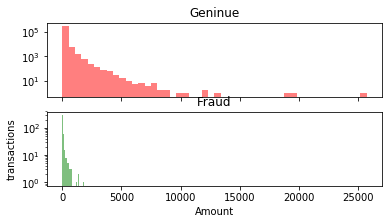

In [43]:
fig, (ax3, ax4) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax3.hist(dataset.Amount[dataset.Class==0],bins=48,color='r',alpha=0.5)
ax3.set_title('Geninue')
ax3.set_yscale('log') # to see the tails
ax4.hist(dataset.Amount[dataset.Class==1],bins=50,color='g',alpha=0.5)
ax4.set_title('Fraud')
ax4.set_yscale('log') # to see the tails
plt.xlabel('Amount')
plt.ylabel('transactions')

In [45]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Class,label,Time_Hr,scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,Geninue,0.000000,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,Geninue,0.000000,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,Geninue,0.000278,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,Geninue,0.000278,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,Geninue,0.000556,-0.073403


/home/negi/negi/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


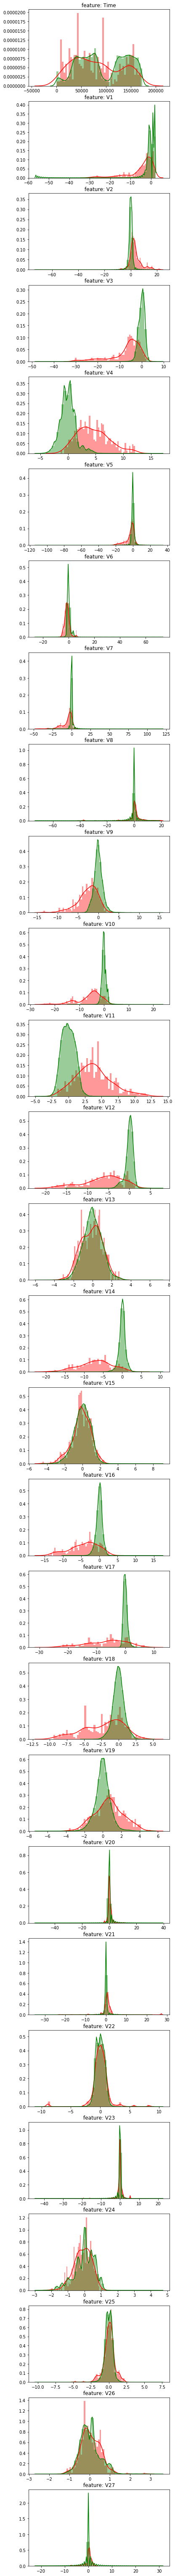

In [49]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(dataset[dataset.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(dataset[col][dataset.Class == 1], bins=50, color='r')
    sns.distplot(dataset[col][dataset.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [90]:
dataset = dataset.drop(['label'],axis=1)

In [91]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556,-0.073403


In [92]:
from sklearn.model_selection import train_test_split
y = dataset['Class'].values #target
print(y)
X = dataset.drop(['Class'],axis=1).values #features
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)


print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
print("fraud cases in test-set: ", sum(y_test))
print(X_train)
print(X_test) 
print(y_train)
print(y_test)


[0 0 0 ... 0 0 0]
[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ... -2.10530535e-02
   0.00000000e+00  2.44964263e-01]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  1.47241692e-02
   0.00000000e+00 -3.42474541e-01]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.97518406e-02
   2.77777778e-04  1.16068593e+00]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ... -2.65608286e-02
   4.79966667e+01 -8.18393021e-02]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.04532821e-01
   4.79966667e+01 -3.13248531e-01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ...  1.36489143e-02
   4.79977778e+01  5.14355311e-01]]
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
[[ 1.61919000e+05  1.94674667e+00 -7.52525821e-01 ... -3.22477642e-02
   4.49775000e+01 -3.23963402e-01]
 [ 1.24477000e+05  2.03514919e+00 -4.88803143e-02 ... -6.90016836e-02
   3.45769444e+01 -3.41275115e-01]
 [ 4.11910000e+04 -9.91919644e-01  6.03192643e-01 ...  1.853

In [93]:
from sklearn.naive_bayes import BernoulliNB
# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train,y_train)

# predict class
y_pred_class = bnb.predict(X_test)
print("y_pred_class value ::\n ", y_pred_class)

# predict probability
y_pred_proba = bnb.predict_proba(X_test)
print("\n y_pred_proba value :: \n", y_pred_proba)

# accuracy
from sklearn import metrics
a = metrics.accuracy_score(y_test, y_pred_class)

print(" \n accuracy of number : \n ", a)

y_pred_class value ::
  [0 0 0 ... 0 0 0]

 y_pred_proba value :: 
 [[9.99999000e-01 9.99965899e-07]
 [9.99999741e-01 2.58891538e-07]
 [9.99881644e-01 1.18355857e-04]
 ...
 [9.99999999e-01 9.49687094e-10]
 [9.99960122e-01 3.98781356e-05]
 [9.99995492e-01 4.50796499e-06]]
 
 accuracy of number : 
  0.9990519995786665


In [94]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [96]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[56846,    18],
       [   36,    62]])

In [97]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [98]:
print (roc_auc) 

0.9575291709255451


In [99]:
print(true_positive_rate)

[0.         0.01020408 0.01020408 ... 1.         1.         1.        ]


In [101]:
print(false_positive_rate)

[0.00000000e+00 0.00000000e+00 1.75858188e-05 ... 9.99841728e-01
 9.99982414e-01 1.00000000e+00]


In [102]:
print(thresholds)

[1.99107568e+00 9.91075680e-01 9.89895829e-01 ... 6.32254173e-12
 6.29196318e-12 5.92334703e-12]


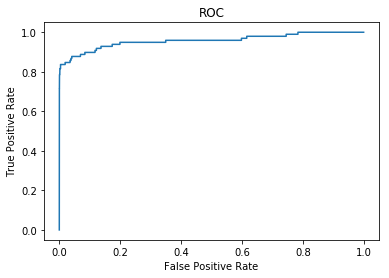

In [103]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)